<div align="center">
  <b> <font size="6">One-Hot Encoding for Multiple Linear Regression - Without SK-Learn</font> </b>
</div>

In [46]:
# Import necessary package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

### Step 1: Load the dataset

In [47]:
# Load the dataset into pandas dataframe
df = pd.read_csv("E:\\MY LECTURES\\DATA SCIENCE\\3.Programs\\dataset\\house_price.csv")     
# Change this location based on the location of dataset in your machine

In [48]:
# Display the first five records
df    

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [49]:
# Dataset shape (number of rows and columns)
df.shape

(13, 3)

### Step 2: Apply EDA

You may apply univariate and bivariate analysis

### Step 3. Pre-process and extract the features

##### Unique values in the dataset

In [50]:
df.nunique()

town      3
area      9
price    13
dtype: int64

##### One hot encoding

In [51]:
dummies = pd.get_dummies(df.town)
dummies

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [52]:
# join dummies dataframe with df dataframe
merged_df = pd.concat([df,dummies],axis='columns')
merged_df

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


##### categorical feature does not work with numerical prediction. So, remove "town" feature as we have one hot encoding for that variable

In [53]:
merged_df.drop('town', axis=1, inplace=True)

In [54]:
merged_df.head()

,area,price,monroe township,robinsville,west windsor
0,2600,550000,1,0,0
1,3000,565000,1,0,0
2,3200,610000,1,0,0
3,3600,680000,1,0,0
4,4000,725000,1,0,0


##### To avoid multi-collinearity among three dummy columns (SK-learn does it for you, but we can do this)

Dummy Variable Trap

When you can derive one variable from other variables, they are known to be multi-colinear. Here if you know values of california and georgia then you can easily infer value of new jersey state, i.e. california=0 and georgia=0. Therefore, these state variables are called to be multi-colinear. In this situation linear regression won't work as expected. Hence you need to drop one column.

NOTE: sklearn library takes care of dummy variable trap hence even if you don't drop one of the state columns it is going to work, however we should make a habit of taking care of dummy variable trap ourselves just in case library that you are using is not handling this for you

In [55]:
merged_df.drop('monroe township', axis=1, inplace=True)

In [56]:
merged_df.head()

,area,price,robinsville,west windsor
0,2600,550000,0,0
1,3000,565000,0,0
2,3200,610000,0,0
3,3600,680000,0,0
4,4000,725000,0,0


In [57]:
merged_df.shape

(13, 4)

##### Swap the price feature to last position

In [58]:
columns_titles = ["area","robinsville","west windsor","price"]
df = merged_df.reindex(columns=columns_titles)
df.head()

,area,robinsville,west windsor,price
0,2600,0,0,550000
1,3000,0,0,565000
2,3200,0,0,610000
3,3600,0,0,680000
4,4000,0,0,725000


In [59]:
# We are going to predict price using all the other features
# Load Price feature into Y and remaining features into X  
X = df.iloc[:,:3].values    
Y = df.iloc[:,3].values    

### Step 4. Split the data for training and testing

In [60]:
# Splitting dataset into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0) 

### Step 5: Training phase (bulding the model)

In [61]:
# Fitting line on two dimension on the training set
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [62]:
b = model.intercept_

In [63]:
coef = model.coef_

In [64]:
print("The linear model is Y = ", end = " ")
counter = 0
for i in coef: 
    print(np.round(i,2),"*",columns_titles[counter], "+", end= " ")
    counter = counter + 1
print(np.round(b,2))

The linear model is Y =  125.21 * area + 30430.79 * robinsville + 38735.88 * west windsor + 213093.22


In [65]:
# Predicting the Training set results
y_train_pred = model.predict(x_train)

##### Visualizing the model

It involves over 3 dimensions, so imagine yourself.

##### Plotting observed sale (x) and predicted sale (y) for training set

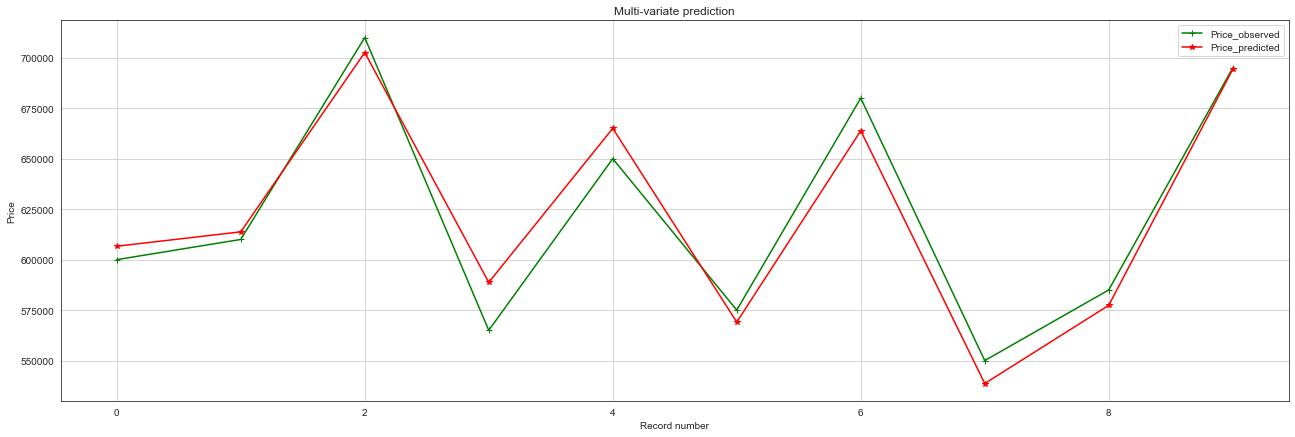

In [66]:
# Predicting the Test set results (displaying only for 100 reocrds)
x = np.arange(len(y_train_pred)) 
fig = plt.figure(figsize=(22,7)) 
plt.plot(x,y_train[:100],"g-+",label="Price_observed")
plt.plot(x,y_train_pred[:100],"r-*",label="Price_predicted")
plt.grid(b=None) 
plt.xlabel("Record number")
plt.ylabel("Price")
plt.title("Multi-variate prediction")
plt.legend()
plt.show() 

#### Residual (Error) plot  

If the model has done good predictions, then the datapoints must be near around to horizontal line.

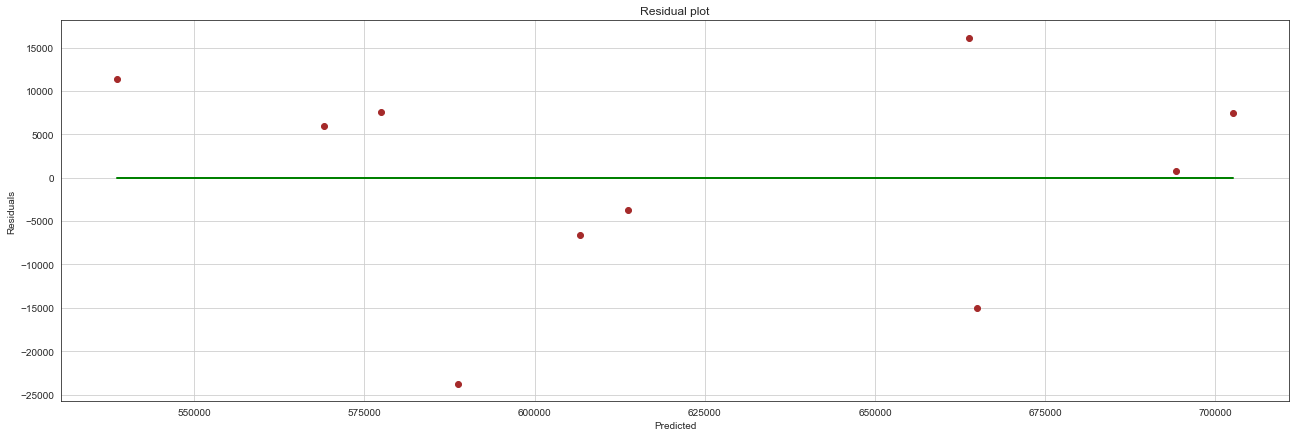

In [67]:
sns.set_style(style='white') 
fig = plt.figure(figsize=(22,7)) 
residuals = y_train-y_train_pred
zeros = y_train-y_train
plt.scatter(y_train_pred,residuals,color="brown")
plt.grid(b=None) 
plt.plot(y_train_pred,zeros,"g")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual plot") 
plt.show()

### Different error calculations to asses the model for training set

##### 1. Sum of Squared Error (SSE)

\begin{equation}
SSE(m,b) = \sum_{i=1}^{n}(y_{i}-\hat y)^{2} = \sum_{i=1}^{n}(y_{i}-(m*x_{i}+b))^{2}
\end{equation}

In [68]:
sum = 0   
n = len(x_train)  
for i in range (0,n):   
  diff = y_train[i] - y_train_pred[i]   
  squ_diff = diff**2   
  sum = sum + squ_diff   
Train_SSE = np.round(sum,2)
print("Sum of Squared Error (SSE) :",Train_SSE)

Sum of Squared Error (SSE) : 1385346045.2


##### 2. Mean Squared Error (MSE)

\begin{equation}
MSE(m,b) = \frac{\sum_{i=1}^{n}(y_{i}-\hat y)^{2}}{n} = \frac{\sum_{i=1}^{n}(y_{i}-(m*x_{i}+b))^{2}}{n}
\end{equation}

In [69]:
Train_MSE = np.round(Train_SSE/n,2)
print("Mean Squared Error (MSE) :",Train_MSE)

Mean Squared Error (MSE) : 138534604.52


##### 3. Root Mean Squared Error (RMSE)

\begin{equation}
RMSE(m,b) = \sqrt{\frac{\sum_{i=1}^{n}(y_{i}-\hat y)^{2}}{n}} = \sqrt{\frac{\sum_{i=1}^{n}(y_{i}-(m*x_{i}+b))^{2}}{n}}
\end{equation}

In [70]:
Train_RMSE = np.round(np.sqrt(Train_MSE),2)
print("Root Mean Squared Error (RMSE) :",Train_RMSE)

Root Mean Squared Error (RMSE) : 11770.07


##### 4. Mean Absolute Error (MAE)

\begin{equation}
MAE(m,b) = \frac{\sum_{i=1}^{n}\left\lvert(y_{i}-\hat y)\right\lvert}{n} 
\end{equation}

In [71]:
sum = 0   
n = len(x_train)  
for i in range (0,n):   
  diff = y_train[i] - y_train_pred[i]   
  sum = sum + np.abs(diff)   
Train_MAE = np.round(sum/n,2)
print("Mean Absolute Error (MAE) :",Train_MAE)

Mean Absolute Error (MAE) : 9833.33


##### 5. Mean Absolute Percentage Error (MAPE)

\begin{equation}
MAPE(m,b) = \frac{100\%}{n}\sum_{i=1}^{n}\left\lvert\frac{(y_{i}-\hat y)}{y_{i}}\right\lvert  = \frac{100\%}{n}\sum_{i=1}^{n}\left\lvert\frac{(y_{i}-(m*x_{i}+b))}{y_{i}}\right\lvert 
\end{equation}

In [72]:
sum = 0   
n = len(x_train)  
for i in range (0,n):   
  diff = (y_train[i] - y_train_pred[i])/y_train[i]
  sum = sum + np.abs(diff)  
Train_MAPE = np.round(sum/n*100,2)
print("Mean Absolute Percentage Error (MAPE) :",Train_MAPE) 

Mean Absolute Percentage Error (MAPE) : 1.62


### Calculating R-Squred value (goodness of model) using SSE

\begin{equation}
R^{2} = 1- \frac{SSE}{SST} = 1- \frac{\sum_{i=1}^{n}(y_{i}-\hat y)^{2}}{\sum_{i=1}^{n}(y_{i}-\bar y)^{2}} 
\end{equation}

In [73]:
from sklearn.metrics import r2_score
out = r2_score(y_train,y_train_pred)
Train_RS = np.round(out,2)*100
print("R-Squred value (goodness of model) for training set :",Train_RS,"%") 

R-Squred value (goodness of model) for training set : 95.0 %


### Step 6: Testing phase

In [74]:
# Predicting values for test input set
y_test_pred = model.predict(x_test)

##### Visualizing the model

It involves more than 3 dimensions, so imagine yourself

##### Plotting observed sale (x) and predicted sale (y) for test set

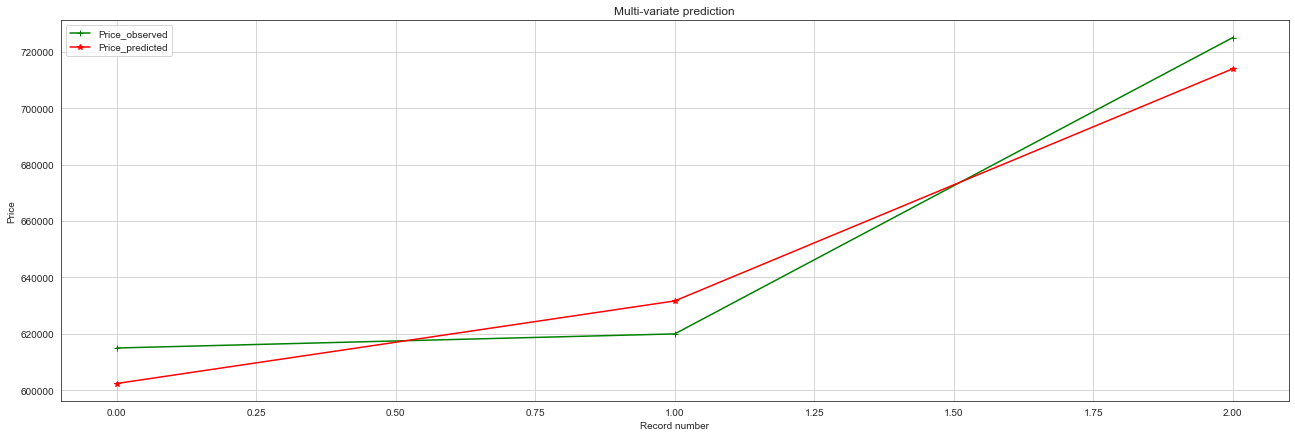

In [75]:
# Plotting the predicted values
x = np.arange(len(y_test_pred)) 
fig = plt.figure(figsize=(22,7)) 
plt.plot(x,y_test,"g-+",label="Price_observed")
plt.plot(x,y_test_pred,"r-*",label="Price_predicted")
plt.grid(b=None) 
plt.xlabel("Record number")
plt.ylabel("Price")
plt.title("Multi-variate prediction")
plt.legend()
plt.show() 

#### Residual (Error) plot  

If the model has done good predictions, then the datapoints must be near around to horizontal line.

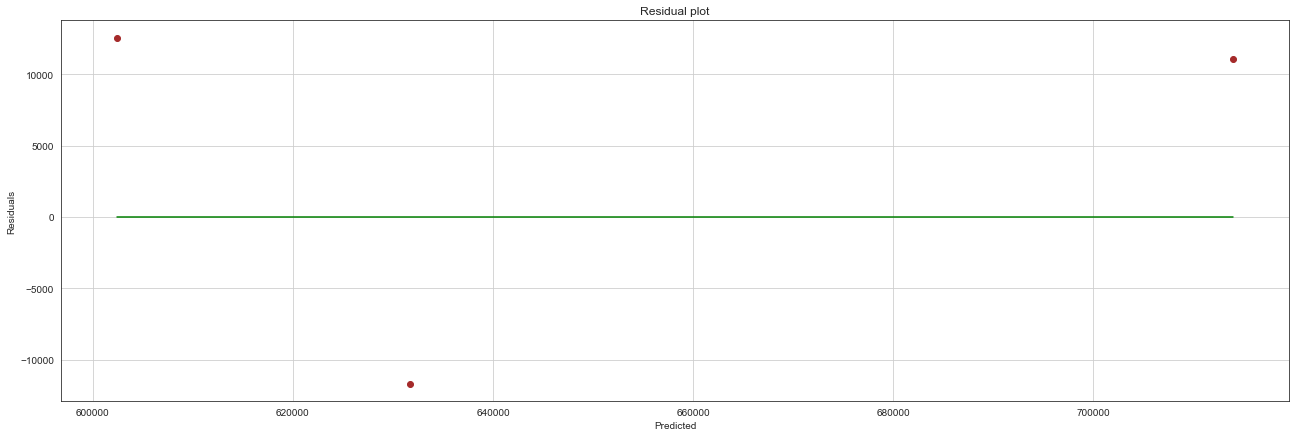

In [76]:
sns.set_style(style='white') 
fig = plt.figure(figsize=(22,7)) 
residuals = y_test-y_test_pred
zeros = y_test-y_test
plt.scatter(y_test_pred,residuals,color="brown")
plt.grid(b=None) 
plt.plot(y_test_pred,zeros,"g")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual plot")
plt.show()

### Different error calculations to asses the model for the test set

##### 1. Sum of Squared Error (SSE)

\begin{equation}
SSE(m,b) = \sum_{i=1}^{n}(y_{i}-\hat y)^{2} = \sum_{i=1}^{n}(y_{i}-(m*x_{i}+b))^{2}
\end{equation}

In [77]:
sum = 0   
n = len(x_test)  
for i in range (0,n):   
  diff = y_test[i] - y_test_pred[i]   
  squ_diff = diff**2   
  sum = sum + squ_diff   
Test_SSE = np.round(sum,2)
print("Sum of Squared Error (SSE) :",Test_SSE)

Sum of Squared Error (SSE) : 416947606.45


##### 2. Mean Squared Error (MSE)

\begin{equation}
MSE(m,b) = \frac{\sum_{i=1}^{n}(y_{i}-\hat y)^{2}}{n} = \frac{\sum_{i=1}^{n}(y_{i}-(m*x_{i}+b))^{2}}{n}
\end{equation}

In [78]:
Test_MSE = np.round(Train_SSE/n,2)
print("Mean Squared Error (MSE) :",Test_MSE)

Mean Squared Error (MSE) : 461782015.07


##### 3. Root Mean Squared Error (RMSE)

\begin{equation}
RMSE(m,b) = \sqrt{\frac{\sum_{i=1}^{n}(y_{i}-\hat y)^{2}}{n}} = \sqrt{\frac{\sum_{i=1}^{n}(y_{i}-(m*x_{i}+b))^{2}}{n}}
\end{equation}

In [79]:
Test_RMSE = np.round(np.sqrt(Test_MSE),2)
print("Root Mean Squared Error (RMSE) :",Test_RMSE)

Root Mean Squared Error (RMSE) : 21489.11


##### 4. Mean Absolute Error (MAE)

\begin{equation}
MAE(m,b) = \frac{\sum_{i=1}^{n}\left\lvert(y_{i}-\hat y)\right\lvert}{n} 
\end{equation}

In [80]:
sum = 0   
n = len(x_test)  
for i in range (0,n):   
  diff = y_test[i] - y_test_pred[i]   
  sum = sum + np.abs(diff)   
Test_MAE = np.round(sum/n,2)
print("Mean Absolute Error (MAE) :",Test_MAE)

Mean Absolute Error (MAE) : 11772.6


##### 5. Mean Absolute Percentage Error (MAPE)

\begin{equation}
MAPE(m,b) = \frac{100\%}{n}\sum_{i=1}^{n}\left\lvert\frac{(y_{i}-\hat y)}{y_{i}}\right\lvert  = \frac{100\%}{n}\sum_{i=1}^{n}\left\lvert\frac{(y_{i}-(m*x_{i}+b))}{y_{i}}\right\lvert 
\end{equation}

In [81]:
sum = 0   
n = len(x_test)  
for i in range (0,n):   
  diff = (y_test[i] - y_test_pred[i])/y_test[i]
  sum = sum + np.abs(diff)   
Test_MAPE = np.round(sum/n*100,2)
print("Mean Absolute Percentage Error (MAPE) :",Test_MAPE) 

Mean Absolute Percentage Error (MAPE) : 1.82


### Calculating R-Squred value (goodness of model) using SSE

\begin{equation}
R^{2} = 1- \frac{SSE}{SST} = 1- \frac{\sum_{i=1}^{n}(y_{i}-\hat y)^{2}}{\sum_{i=1}^{n}(y_{i}-\bar y)^{2}} 
\end{equation}

In [82]:
from sklearn.metrics import r2_score
out = r2_score(y_test,y_test_pred)
Test_RS = np.round(out,2)*100
print("R-Squred value (goodness of model) for testing set :",Test_RS,"%")  

R-Squred value (goodness of model) for testing set : 95.0 %


### Step 7. Underfitting and overfitting observation

In [83]:
print("Error \t From training phase       From testing phase ")
print("===================================================")
print("SSE   \t\t",Train_SSE,"\t\t", Test_SSE)
print("MSE   \t\t",Train_MSE,"\t\t", Test_MSE)
print("RMSE   \t\t",Train_RMSE,"\t\t", Test_RMSE)
print("MAE   \t\t",Train_MAE,"\t\t", Test_MAE)
print("RS   \t\t",Train_RS,"\t\t\t", Test_RS)

Error 	 From training phase       From testing phase 
SSE   		 1385346045.2 		 416947606.45
MSE   		 138534604.52 		 461782015.07
RMSE   		 11770.07 		 21489.11
MAE   		 9833.33 		 11772.6
RS   		 95.0 			 95.0


### Step 8. Let us predict for future inputs

How much is the house price for 3200 square feet in monroe township? pass input as 3200,0,0 (third feature (monroe township) we dropped is taken as 1, in this case).

In [84]:
model.predict([[3200,0,0]])

array([613771.18644068])

How much is the house price for 2800 square feet in robinsvill? pass input as 2800,1,0 (third feature (monroe township) is taken as 0).

In [85]:
model.predict([[2800,1,0]])

array([594117.23163842])

How much is the house price for 3400 square feet in west windsor? pass input as 3400,0,1 (third feature (monroe township) we dropped is taken as 0).

In [86]:
model.predict([[3400,0,1]])

array([677549.43502825])